<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/ReglaFalsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Metodo de la regla falsa
Omar Torres
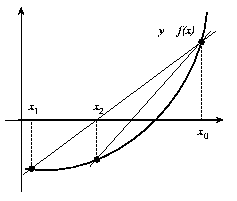

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

**Entrada de datos**

In [19]:
err = float(input("Digite el error aceptable "))
err_ref = float(input("Digite un error de referencia cual quieraq ejemplo err "))
xl  = float(input("Ingrese la frontera inferior del intervalo "))
xu  = float(input("Ingrese la frontera superior del intervalo "))

Digite el error aceptable 0.001
Digite un error de referencia cual quieraq ejemplo err 1
Ingrese la frontera inferior del intervalo 0
Ingrese la frontera superior del intervalo 2


Grafica de f(x) = x^4 + x3 -2
[0,1]

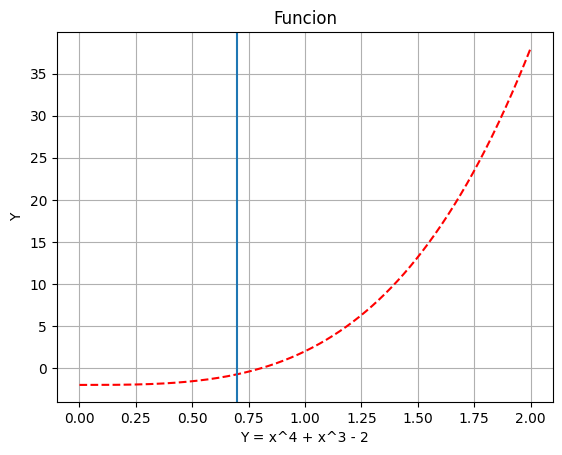

In [23]:
def graf_function():
  X = list(np.arange(xl,xu, err))
  Y=[((x**4)+ 3*(x**3) - 2) for x in X]

  plt.title("Funcion")
  plt.xlabel("Y = x^4 + x^3 - 2")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axvline(x=0.7, ymin=0.0, ymax=30)
  plt.grid()
  plt.show()

graf_function()

**Clase ReglaFalsa**

In [31]:
from re import S
class ReglaFalsa:
  def __init__(self, xl, xu, error):
     self.__xl = xl
     self.__xu = xu
     self.__error=error
     self.__error_act=0
     self.__err_ref = 1
     self.__xr_i =0
     self.__fxl = 0
     self.__fxu = 1
     self.__fr =2
     self.__fr_old =100
     self.__xr_old = 0
     self.__i =0
     self.__lista_error=[]

  def __printf(self):                              #Imprime los valores parciales de los f(x) y el error
      print("______________________________________________________________________________________________________")
      print("i = ", self.__i)
      print("xl = ",self.__xl, "fxl = ",self.__fxl)
      print("xlu = ",self.__xu, "fxu = ",self.__fxu)
      print("xl = ",self.__xr_old, "fxl = ",self.__fr_old)
      print("error = ",self.__error_act)

  def __f(self, x):
    fx = ((x**4)+ 3*(x**3) - 2)
    return fx

  def __cal_xr(self):
    x_num = self.__fxu*(self.__xl - self.__xu)
    x_denom = self.__fxl - self.__fxu
    xr = self.__xu - (x_num)/x_denom
    return xr

  def __errorAptual(self):
    error=0
    if self.__xr_old != 0:
      error = (  self.__xr_old - self.__xr_i)/self.__xr_old
    self.__err_actual = np.abs(error)
    return self.__err_actual

  def get_lista_errores(self):
    return self.__lista_error

  def cal_raiz(self):
    flag = True
    err = self.__err_ref    #Se inicializa un error para entrar al while
    xr=0
    i=0
    while err > self.__error:
        self.__printf()
        self.__i = self.__i + 1
        fxl = self.__f(self.__xl)
        fxu = self.__f(self.__xu)
        self.__fxl = fxl
        self.__fxu = fxu
        self.__xr_i  = self.__xr_old
        xr = self.__cal_xr()
        self.__fr_old = self.__fr
        fr = self.__f(xr)
        self.__fr = fr
        self.__xr_old = xr
        err =  self.__errorAptual()
        self.__lista_error.append(err)
        self.__error_act =err
        if (fxl)*(fxu) < 0:       #Convergencia
            if fxl*fr <0:    #[xl, xr] contiene la raiz
                self._xl = xl
                self.__xu = xr
            else:
                if fxl*fr:   #[xr, xu] contiene la raiz
                  self.__xl = xr
                  self.__xu = self.__xu
        else:
          flag = False

    return self.__xr_old

**Funcion main()**

In [32]:
errores =[]
obj= ReglaFalsa(xl,xu,err)
def main():
  errores = obj.get_lista_errores()
  print("Raiz = ",obj.cal_raiz())
if __name__=='__main__':
   main()
errores = obj.get_lista_errores()

______________________________________________________________________________________________________
i =  0
xl =  0.0 fxl =  0
xlu =  2.0 fxu =  1
xl =  0 fxl =  100
error =  0
______________________________________________________________________________________________________
i =  1
xl =  0.10000000000000009 fxl =  -2.0
xlu =  2.0 fxu =  38.0
xl =  0.10000000000000009 fxl =  2
error =  1.0
______________________________________________________________________________________________________
i =  2
xl =  0.19486010165787815 fxl =  -1.9969
xlu =  2.0 fxu =  38.0
xl =  0.19486010165787815 fxl =  -1.9969
error =  0.4868113115553375
______________________________________________________________________________________________________
i =  3
xl =  0.2841030641846647 fxl =  -1.9763614615970484
xlu =  2.0 fxu =  38.0
xl =  0.2841030641846647 fxl =  -1.9763614615970484
error =  0.31412178810144525
_____________________________________________________________________________________________

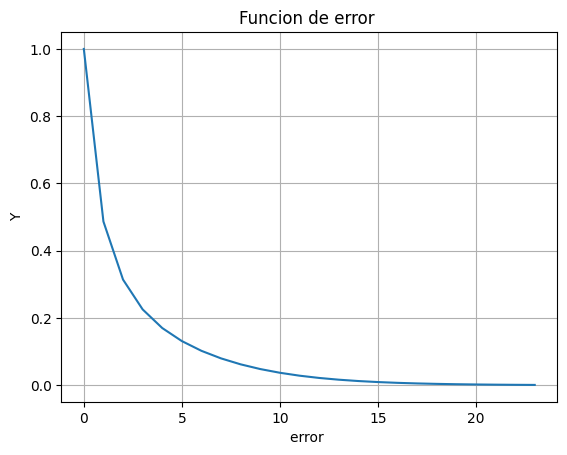

In [35]:

def graf_f():
  X = errores
  Y = np.linspace(0, 10, num=15,endpoint=False)
  plt.title("Funcion de error ")
  plt.xlabel("error ")
  plt.ylabel("Y")
  plt.plot(X)
  plt.grid()
  plt.show()
graf_f()

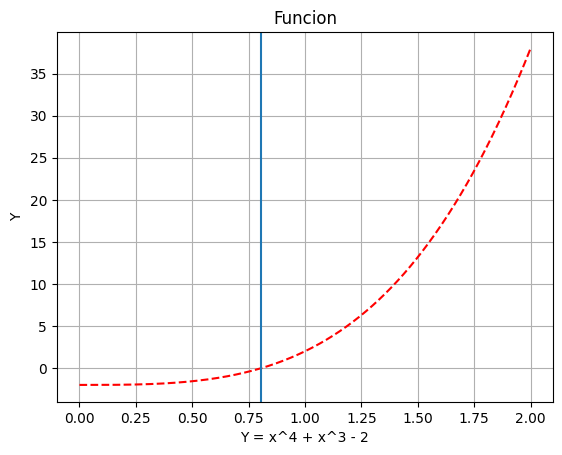

In [30]:
def graf_function():
  X = list(np.arange(xl,xu, err))
  Y=[((x**4)+ 3*(x**3) - 2) for x in X]

  plt.title("Funcion")
  plt.xlabel("Y = x^4 + x^3 - 2")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axvline(x=0.8045437128223942, ymin=0.0, ymax=30)
  plt.grid()
  plt.show()

graf_function()